In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

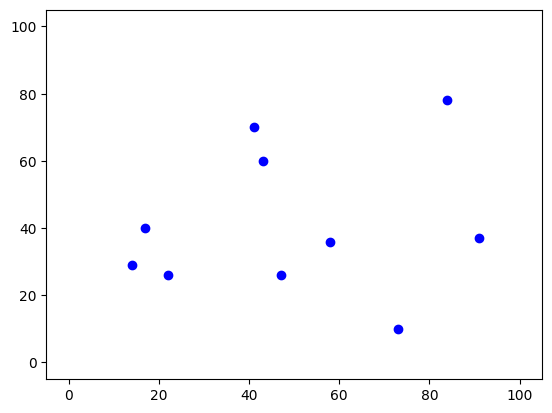

In [12]:
# node / [x coordinate, y coordinate]
node = np.random.randint(101, size=(10,2))

for i in node:
    plt.scatter(i[0], i[1], c="b")
plt.axis([-5, 105, -5, 105])
plt.show()

In [13]:
# build distance matrix
distance_matrix = np.zeros((len(node),len(node)))

for i in range(len(node)):
    for j in range(len(node)):
        distance_matrix[i][j] = np.linalg.norm(np.array((node[i][0],node[i][1]))-np.array((node[j][0],node[j][1])))

In [14]:
class GeneticAlgorithm:

    def __init__(self):

        self.population = []
        self.parent = []
        self.best = None
        self.best_log = []
        self.best_score_log = []

    def initialize(self, n_population, n_nodes):

        self.population = [np.random.permutation(n_nodes) for _ in range(n_population)]

    def get_objective_value(self, solution): # calculate fitness

        objective = 0
        distance_list = [distance_matrix[solution[idx]][solution[idx+1]] for idx in range(len(solution)-1)]
        objective = sum(distance_list) + distance_matrix[solution[-1]][solution[0]]

        return objective

    def elitism(self, n_parent):

        self.parent = []
        fitness_population = {}
        for solution in self.population:
            fitness = self.get_objective_value(solution)
            fitness_population[fitness] = solution
        sorted_dict = sorted(fitness_population.items())

        self.best = sorted_dict[0][1]
        best_fitness = self.get_objective_value(self.best)
        self.best_log.append(self.best)
        self.best_score_log.append(best_fitness)

        for sol_tuple in sorted_dict[:n_parent]:
            self.parent.append(sol_tuple[1])

    def tournament_selection(self, n_tournament):

        participants = random.sample(self.population, n_tournament)
        fitness_population = {}
        for solution in participants:
            fitness = self.get_objective_value(solution)
            fitness_population[fitness] = solution
        sorted_dict = sorted(fitness_population.items())
        winner = sorted_dict[0][1]

        return winner

    # Partially Mapped Crossover
    def crossover(self, parent1, parent2):

        child = np.zeros_like(parent1)

        # Select two random indices to create a subset
        idx1, idx2 = sorted(np.random.randint(len(parent1), size=2))

        # Create a subset from both parents
        subset_parent1 = parent1[idx1:idx2]
        subset_parent2 = parent2[idx1:idx2]

        # Initialize the child with the subset from the first parent
        child[idx1:idx2] = subset_parent1

        # Perform mapping from parent2 to parent1
        for i in range(idx1, idx2):
            if parent2[i] not in subset_parent1:
                current_value = parent2[i]
                idx = np.where(subset_parent2 == current_value)[0][0]
                while subset_parent1[idx] in subset_parent2:
                    current_value = subset_parent1[idx]
                    idx = np.where(subset_parent2 == current_value)[0][0]
                child[idx1 + idx] = parent2[i]

        # Fill in the remaining positions with values from parent2
        for i in range(len(parent1)):
            if child[i] == 0:
                child[i] = parent2[i]

        return child

    def mutation(self, solution):

        mutated_solution = np.copy(solution)
        idx1 = np.random.randint(len(mutated_solution))
        idx2 = np.random.randint(len(mutated_solution))

        while idx1 == idx2:
            idx2 = np.random.randint(len(mutated_solution))

        mutated_solution[[idx1, idx2]] = mutated_solution[[idx2, idx1]]

        return mutated_solution

    def genetic_algorithm(self, n_population, n_parent, n_nodes, n_tournament, p_crossover, p_mutation, max_generation):

        self.initialize(n_population, n_nodes)
        for _ in tqdm(range(max_generation)):
            self.elitism(n_parent)
            population = []

            while len(population) != n_population - len(self.parent):
                parent1 = self.tournament_selection(n_tournament)
                parent2 = self.tournament_selection(n_tournament)

                if p_crossover >= np.random.rand(1)[0]:
                    offspring = self.crossover(parent1, parent2)  # Pass n_nodes
                else:
                    random_parent = [parent1, parent2]
                    offspring = random_parent[np.random.randint(len(random_parent))]

                if p_mutation >= np.random.rand(1)[0]:
                    offspring = self.mutation(offspring)

                population.append(offspring)

            population += self.parent
            self.population = population

        self.elitism(n_parent)


In [15]:
ga = GeneticAlgorithm()
ga.genetic_algorithm(3, 3, 10, 2, 0.9, 0.1, 10)

100%|██████████| 10/10 [00:00<00:00, 14266.34it/s]


In [16]:
def draw_route(solution):
    for i in node:
        plt.scatter(i[0], i[1], c="b")
    for idx in range(len(solution)-1):
        plt.plot([node[solution[idx]][0],node[solution[idx+1]][0]], [node[solution[idx]][1],node[solution[idx+1]][1]], c="green")
    plt.plot([node[solution[-1]][0],node[solution[0]][0]], [node[solution[-1]][1],node[solution[0]][1]], c="green")
    plt.axis([-5, 105, -5, 105])
    plt.show()

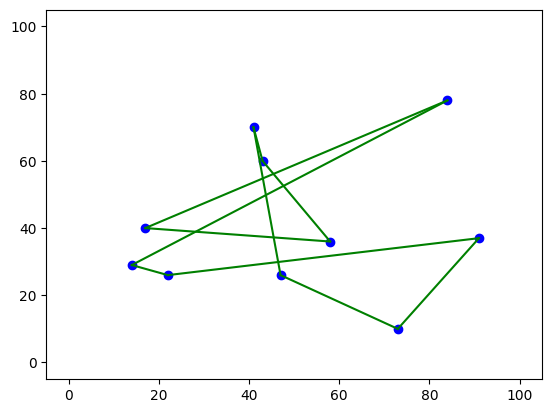

In [17]:
best_solution = ga.best
draw_route(best_solution)